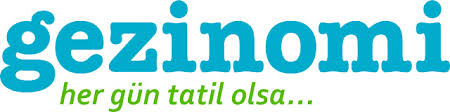

 # Information about the project:
  ### This is a case study project I completed during my miuul datascientist bootcamp week 2. It contains sales data from a company called gezinomi, which sells holiday packages in Türkiye

# Business Problem
    Gezinomi uses some of the features of its sales to provide level-based (level based) new sales definitions and create new sales definitions segments according to their definitions and create new segments according to these segmentshow much the company can earn on average from prospective customers to predict the outcome. 

     For example: It is desired to determine how much a customer who wants to go to an All Inclusive hotel from Antalya during a busy period can spend on average.

# Dataset History and Variables
    The data set contains the prices of the sales made by Gezinomi company and information about these sales. The data set consists of records that occur in each sales transaction. This means that the table is not deduplicated. In other words, the customer may have made more than one purchase.
    
    Variables:
    SaleId: Sale id
    SaleDate : Sale Date
    Price: Price paid for the sale
    ConceptName:Hotel concept information
    SaleCityName: City information where the hotel is located
    CheckInDate Customer's check-in date
    CInDay:Customer's check-in day
    SaleCheckInDayDiff: Day difference between check in and check-in date
    Season:Season information on the check-in date

#### Now we will move forward by completing given tasks.Task 1 consists of 9 questions. Let's start.

 # Task 1: Answer the following questions

### Question 1:
    Read the gezinomi.xlsx file and show general information about the data set


In [1]:
import pandas as pd
df = pd.read_excel("/kaggle/input/gezinomi/miuul_gezinomi.xlsx")
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low


In [2]:
df.describe()

,SaleId,SaleDate,CheckInDate,Price,SaleCheckInDayDiff
count,59164.000000,59164,59164,59151.000000,59164.000000
mean,302675.795433,2021-02-11 17:13:11.751740928,2021-03-15 11:23:01.732134400,61.345057,31.840173
min,51707.000000,2016-01-02 00:00:00,2007-07-20 00:00:00,0.000000,0.000000
25%,274038.500000,2020-08-19 00:00:00,2020-08-24 00:00:00,35.343035,2.000000
50%,321607.000000,2021-07-28 00:00:00,2021-08-16 00:00:00,54.261294,10.000000
75%,367373.000000,2022-05-10 00:00:00,2022-07-04 00:00:00,77.962578,34.000000
max,415122.000000,2022-12-03 00:00:00,2023-08-16 00:00:00,4880.471380,630.000000
std,87943.222683,NaN,NaN,51.384617,51.493509


### Question 2: How many unique cities are there? What are their frequencies?

In [3]:
df["SaleCityName"].nunique()

6

In [4]:
df["SaleCityName"].value_counts()

SaleCityName
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: count, dtype: int64

### Question 3: How many unique concepts are there?

In [5]:
df["ConceptName"].nunique()

3

### Question 4: Calculate the number of sales according to the concepts

In [6]:
df.groupby("ConceptName").agg({"SaleId" : "count"})

,SaleId
ConceptName,
Herşey Dahil,53186
Oda + Kahvaltı,2419
Yarım Pansiyon,3559


### Question 5: What is the total amount earned from sales by city?

In [7]:
df.groupby("SaleCityName").agg({"Price": "sum"})

,Price
SaleCityName,
Antalya,2.041911e+06
Aydın,5.732960e+05
Diğer,1.545723e+05
Girne,2.706503e+04
Muğla,6.658422e+05
İzmir,1.659348e+05


### Question 6:  How much was earned in total according to Concept Types?

In [8]:
df.groupby("ConceptName").agg({"Price": "sum"})

,Price
ConceptName,
Herşey Dahil,3.332911e+06
Oda + Kahvaltı,1.213084e+05
Yarım Pansiyon,1.744024e+05


### Question 7:  What are the PRICE averages by city?

In [9]:
df.groupby("SaleCityName").agg({"Price":"mean"}).sort_values(by="Price",ascending = False)

,Price
SaleCityName,
İzmir,66.267905
Antalya,64.521474
Muğla,62.461746
Girne,59.483579
Aydın,53.855896
Diğer,47.707497


### Question 8:  What are the PRICE averages by concept?

In [10]:
df.groupby("ConceptName").agg({"Price":"mean"}).sort_values(by="Price",ascending = False)

,Price
ConceptName,
Herşey Dahil,62.672260
Oda + Kahvaltı,50.252010
Yarım Pansiyon,49.030742


### Question 9: What are the PRICE averages by City  and Concept together?

In [11]:
df.groupby(["SaleCityName","ConceptName"]).agg({"Price":"mean"})

Price
SaleCityName ConceptName              
Antalya      Herşey Dahil    64.519028
             Oda + Kahvaltı  63.504816
             Yarım Pansiyon  67.190613
Aydın        Herşey Dahil    53.995467
             Oda + Kahvaltı  34.458787
             Yarım Pansiyon  30.016543
Diğer        Herşey Dahil    84.771093
             Oda + Kahvaltı  37.599082
             Yarım Pansiyon  42.113440
Girne        Herşey Dahil    97.680970
             Oda + Kahvaltı  39.775536
             Yarım Pansiyon  53.247838
Muğla        Herşey Dahil    63.020053
             Oda + Kahvaltı  59.037763
             Yarım Pansiyon  45.120924
İzmir        Herşey Dahil    74.701519
             Oda + Kahvaltı  41.320342
             Yarım Pansiyon  59.610053

In [12]:
# Another solution
df.pivot_table(values = "Price", index = "SaleCityName", columns = "ConceptName", aggfunc = "mean")

ConceptName,Herşey Dahil,Oda + Kahvaltı,Yarım Pansiyon
SaleCityName,,,
Antalya,64.519028,63.504816,67.190613
Aydın,53.995467,34.458787,30.016543
Diğer,84.771093,37.599082,42.113440
Girne,97.680970,39.775536,53.247838
Muğla,63.020053,59.037763,45.120924
İzmir,74.701519,41.320342,59.610053


# Task 2 : Convert the SaleCheckInDayDiff variable to a categorical variable.
    - The SaleCheckInDayDiff variable indicates how long before the CheckIn date the customer completed the purchase.
    - Create the intervals convincingly.
      For example: you can use the ranges '0_7', '7_30', '30_90', '90_max'.
    -You can use the names "Last Minuters", "Potential Planners", "Planners", "Early Bookers" for these intervals.

In [13]:
# Let's adjust the bins and labels.
bins_ =[0, 7, 30, 90, df["SaleCheckInDayDiff"].max()] 
labels_ = ['Last Minuters','Potential Planners', 'Planners','Early Bookers']

In [14]:
df["CheckInType"] = pd.cut(df["SaleCheckInDayDiff"], bins = bins_, labels = labels_, include_lowest = True)

In [15]:
# Let's have a look at the dataset to check our new variable: CheckInType
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,CheckInType
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low,Last Minuters
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High,Last Minuters
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low,Last Minuters
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low,Last Minuters


# Task 3: What are the average earnings by City, Concept, CheckInType, breakdown?

In [16]:
df.groupby(["SaleCityName", "ConceptName", "CheckInType"],observed=True).agg({"Price": "mean"})

Price
SaleCityName ConceptName    CheckInType                  
Antalya      Herşey Dahil   Last Minuters       62.752916
                            Potential Planners  64.903700
                            Planners            67.879960
                            Early Bookers       66.494885
             Oda + Kahvaltı Last Minuters       65.353740
...                                                   ...
İzmir        Oda + Kahvaltı Early Bookers       66.928111
             Yarım Pansiyon Last Minuters       57.788126
                            Potential Planners  64.804043
                            Planners            60.507887
                            Early Bookers       65.905583

[72 rows x 1 columns]

# Task 4: Sort the output of City-Concept Season breakdown according to PRICE. Save the output as agg_df.

In [17]:
agg_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price":"mean"}).sort_values(by="Price",ascending=False)
agg_df.head()

Price
SaleCityName ConceptName    Seasons            
Girne        Herşey Dahil   High     103.935448
                            Low       90.935944
İzmir        Yarım Pansiyon High      87.657303
Diğer        Herşey Dahil   Low       87.310882
                            High      83.787273

# Task 5: Convert the index names to variable names.
    All variables except PRICE in the output of the fourth question are index names. Convert these names to variable names.

In [18]:
agg_df.reset_index(inplace=True)
agg_df.head()

,SaleCityName,ConceptName,Seasons,Price
0,Girne,Herşey Dahil,High,103.935448
1,Girne,Herşey Dahil,Low,90.935944
2,İzmir,Yarım Pansiyon,High,87.657303
3,Diğer,Herşey Dahil,Low,87.310882
4,Diğer,Herşey Dahil,High,83.787273


# Task 6: Define a new level-based customer persona.
    Define the new level-based sales and add it as a variable to the data set.
    Name of the new variable to be added: sales_level_based
    You need to create the variable sales_level_based by combining the observations in the output you will obtain in the previous question.

In [19]:
agg_df["sales_level_based"] = agg_df[["SaleCityName", "ConceptName", "Seasons"]].apply(lambda x:"_".join(x), axis= 1).str.upper()
agg_df.head()

,SaleCityName,ConceptName,Seasons,Price,sales_level_based
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH


# Task 7: Define a new level-based customer persona.
    -Divide the new personas into 4 segments according to PRICE.
    - Add the segments to agg_df as a variable with SEGMENT naming.
    - Describe the segments (group by segments and get price mean, max, sum).

In [20]:
agg_df["segment"] = pd.qcut(agg_df["Price"], q = 4, labels = ["D","C","B","A"])
agg_df.head()

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,segment
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW,A
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH,A
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW,A
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH,A


In [21]:
agg_df.groupby("sales_level_based").agg({"Price":"mean"})

,Price
sales_level_based,
ANTALYA_HERŞEY DAHIL_HIGH,64.920065
ANTALYA_HERŞEY DAHIL_LOW,61.552427
ANTALYA_ODA + KAHVALTI_HIGH,66.267969
ANTALYA_ODA + KAHVALTI_LOW,60.666730
ANTALYA_YARIM PANSIYON_HIGH,73.259029
ANTALYA_YARIM PANSIYON_LOW,62.001678
AYDIN_HERŞEY DAHIL_HIGH,54.946560
AYDIN_HERŞEY DAHIL_LOW,33.680699
AYDIN_ODA + KAHVALTI_HIGH,30.387530


# Task 8: Categorise new customers and estimate how much revenue they can generate
    - How much income is a person who wants to have an all-inclusive holiday in Antalya in high season expected to earn on average?
    - In which segment will a holidaymaker who goes to a half board hotel in Girne in low season be placed?

In [22]:
new_user = "ANTALYA_HERŞEY DAHIL_HIGH"
agg_df[agg_df["sales_level_based"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,segment
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,B


In [23]:
another_user = 'GIRNE_YARIM PANSIYON_LOW'
agg_df[agg_df['sales_level_based'] == another_user]

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,segment
19,Girne,Yarım Pansiyon,Low,48.578903,GIRNE_YARIM PANSIYON_LOW,C


# Summary:
    This case study contributed to the use of the pandas library in exploratory data analysis, the use of commonly used functions in data preprocessing such as apply and lambda, data preprocessing, data filtering, aggregation.